In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

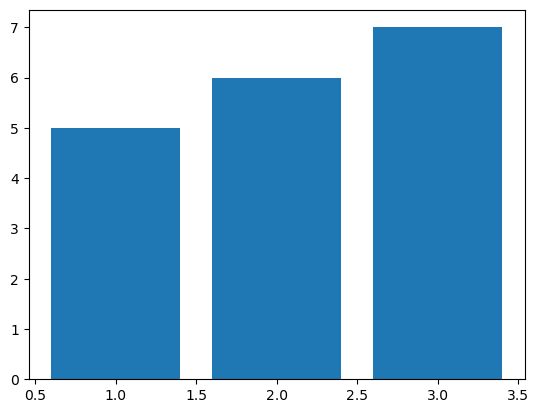

In [3]:
x=[1,2, 3]
y=[5, 6, 7]
plt.bar(x,y)
plt.show()

In [4]:
num_vehicles_by_year = data['Model Year'].value_counts().reset_index()

In [5]:
num_vehicles_by_year.head(5)

,Model Year,count
0,2023,57587
1,2022,27776
2,2021,19132
3,2018,14323
4,2020,11768


In [6]:
num_vehicles_by_year['Model Year'].head(5)

0    2023
1    2022
2    2021
3    2018
4    2020
Name: Model Year, dtype: int64

In [7]:
num_vehicles_by_year['count'].head(5)

0    57587
1    27776
2    19132
3    14323
4    11768
Name: count, dtype: int64

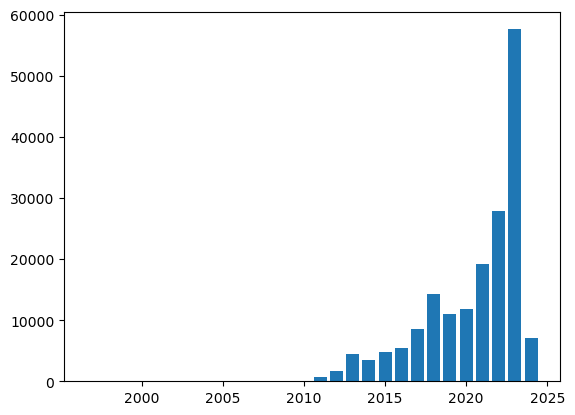

In [8]:
plt.bar(data=num_vehicles_by_year, x=num_vehicles_by_year['Model Year'], height=num_vehicles_by_year['count'])

plt.show()

In [15]:
top_3_counties = data['County'].value_counts().head(3).index

In [18]:
top_3_counties_data = data[data['County'].isin(top_3_counties)]

In [24]:
ev_city_top_counties = top_3_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name="Num of EVs").head(10)

In [25]:
ev_city_top_counties

,County,City,Num of EVs
0,King,Seattle,29447
1,King,Bellevue,8930
2,King,Redmond,6478
3,King,Kirkland,5362
4,King,Sammamish,5280
5,King,Renton,4980
6,Snohomish,Bothell,4663
7,Pierce,Tacoma,3722
8,King,Tukwila,2927
9,King,Kent,2782


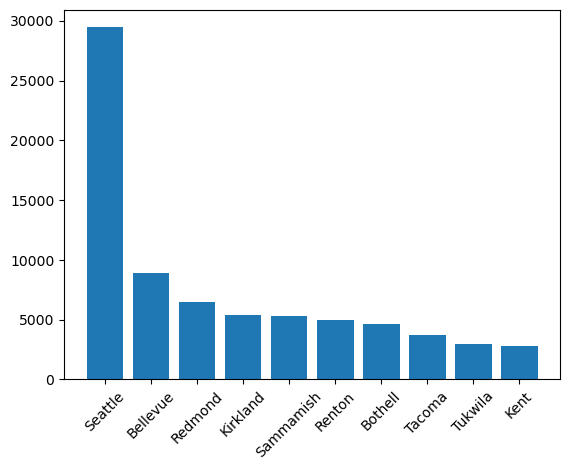

In [38]:
plt.bar(data = ev_city_top_counties, x="City", height="Num of EVs")
plt.xticks(rotation=45)
plt.show()

In [48]:
ev_types = data['Electric Vehicle Type'].value_counts()
ev_types

Electric Vehicle Type
Battery Electric Vehicle (BEV)            139210
Plug-in Hybrid Electric Vehicle (PHEV)     38656
Name: count, dtype: int64

<BarContainer object of 2 artists>

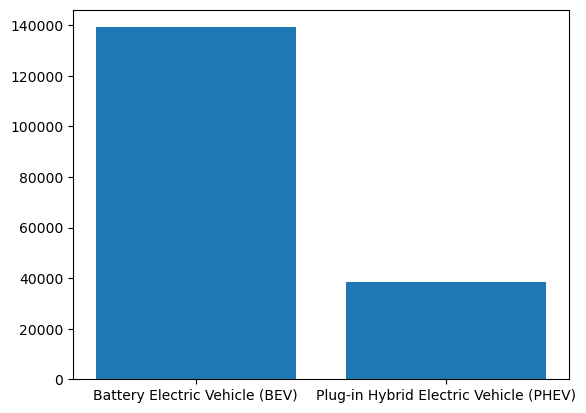

In [49]:
plt.bar(ev_types.index, ev_types.values)

In [57]:
top_makes = data['Make'].value_counts().head(10)
top_makes

Make
TESLA         79659
NISSAN        13998
CHEVROLET     13678
FORD           9199
BMW            7570
KIA            7432
TOYOTA         6288
VOLKSWAGEN     5004
JEEP           4480
HYUNDAI        4406
Name: count, dtype: int64

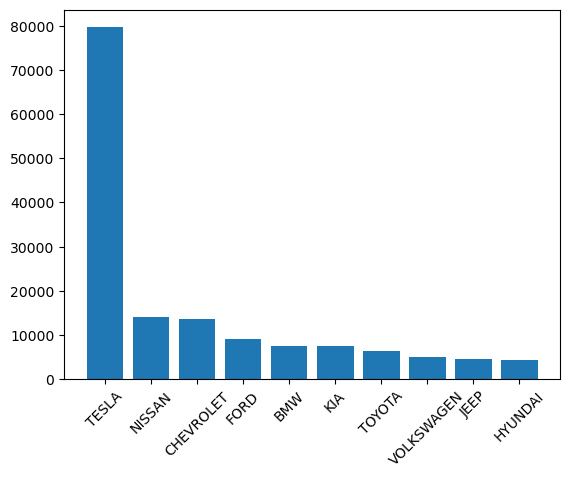

In [56]:
plt.bar(top_makes.index, top_makes.values)
plt.xticks(rotation=45)
plt.show()

In [73]:
top_3_makes = top_makes.head(3).index
top_3_makes_data = data[data['Make'].isin(top_3_makes)]
ev_model_distribution_top_makes = top_3_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name="Num of EVs")
top_models = ev_model_distribution_top_makes.head(10)

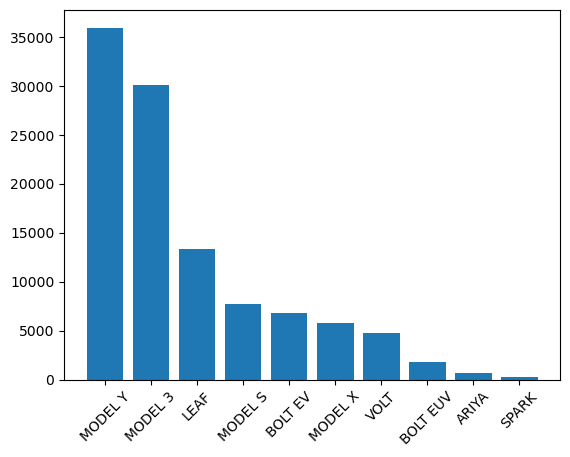

In [77]:
plt.bar(data=top_models, x="Model", height="Num of EVs")
plt.xticks(rotation=45)
plt.show()

In [81]:
data['Electric Range']

0         291
1           0
2         270
3         210
4           0
         ... 
177861      0
177862      0
177863      0
177864      0
177865      0
Name: Electric Range, Length: 177866, dtype: int64

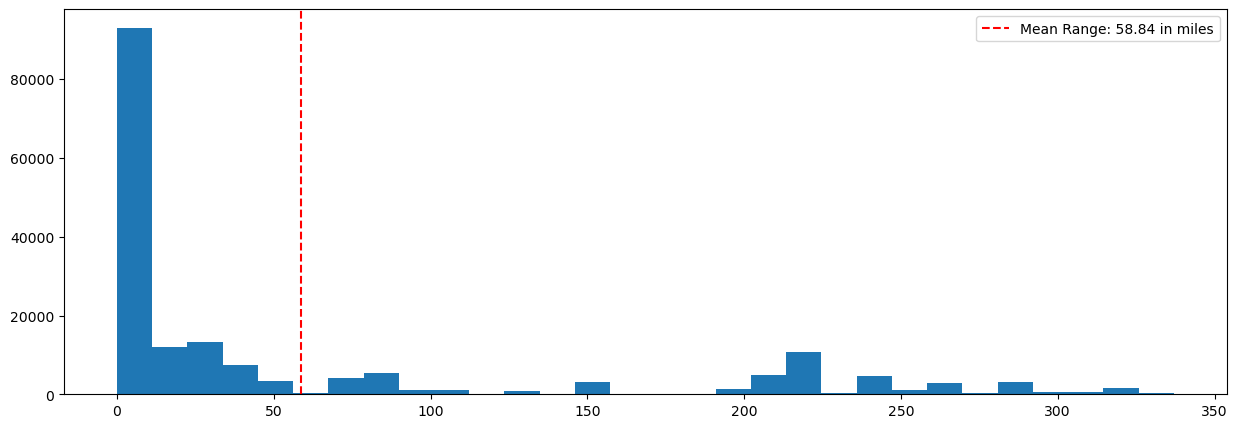

In [98]:
plt.figure(figsize=(15,5))
plt.hist(data['Electric Range'], bins=30)
plt.axvline(x=data['Electric Range'].mean(), color="red", linestyle="dashed", label=f'Mean Range: {round(data["Electric Range"].mean(), 2)} in miles')

plt.legend()
plt.show()

In [108]:
average_range_by_year = data.groupby('Model Year')['Electric Range'].mean().reset_index(name="Mean Electric Range")
average_range_by_year

,Model Year,Mean Electric Range
0,1997,39.000000
1,1998,58.000000
2,1999,74.000000
3,2000,58.000000
4,2002,95.000000
5,2003,95.000000
6,2008,220.000000
7,2010,226.086957
8,2011,70.891613
9,2012,61.212608


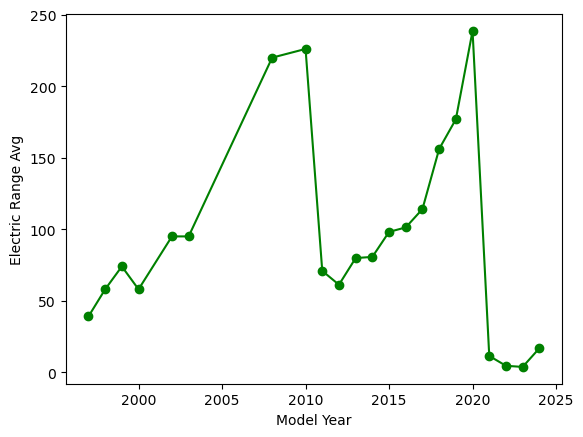

In [119]:
plt.plot(average_range_by_year['Model Year'], average_range_by_year['Mean Electric Range'], color="green", marker="o")
plt.xlabel('Model Year')
plt.ylabel('Electric Range Avg')

plt.show()

In [127]:
top_3_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean()

Make       Model       
CHEVROLET  BLAZER EV         0.000000
           BOLT EUV          0.000000
           BOLT EV         154.810732
           S-10 PICKUP      39.000000
           SILVERADO EV      0.000000
           SPARK            82.000000
           VOLT             45.356130
NISSAN     ARIYA             0.000000
           LEAF             84.148062
TESLA      MODEL 3         109.512728
           MODEL S         176.924499
           MODEL X         137.241028
           MODEL Y          19.179527
           ROADSTER        234.361702
Name: Electric Range, dtype: float64